<a href="https://colab.research.google.com/github/ljnmuyrong/Final-Examination/blob/main/training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import os
import glob
from IPython.display import Image as IPImage
import pandas as pd             # Pandas
import numpy as np              # NumPy
import matplotlib.pyplot as plt # Matplotlib
import seaborn as sns           # Seaborn
from PIL import Image           # Pillow

# TensorFlow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model

# Keras
from keras.layers import Flatten, Dense, Activation, Dropout
from keras import models, optimizers
from keras.models import Sequential
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam, Adamax
from keras.preprocessing.image import ImageDataGenerator
from keras.models import model_from_json
from keras.regularizers import l2
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications import DenseNet121
from keras.applications.densenet import DenseNet121, preprocess_input

from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_data = '/content/drive/MyDrive/Data'

In [8]:

pd.DataFrame(
    os.listdir(train_data),
    columns=['File Name']
)

,File Name
0,puppy
1,airplane
2,Dinosaur
3,Flag
4,.ipynb_checkpoints


In [9]:

train_files = [i for i in glob.glob(train_data + "/*/*")]
np.random.shuffle(train_files)
labels = [os.path.dirname(i).split("/")[-1] for i in train_files]
data = zip(train_files, labels)
training_data = pd.DataFrame(data, columns=["Path", "Label"])
training_data

,Path,Label
0,/content/drive/MyDrive/Data/puppy/puppy-shots.jpg,puppy
1,/content/drive/MyDrive/Data/puppy/images90.jpg,puppy
2,/content/drive/MyDrive/Data/puppy/image15.jpeg,puppy
3,/content/drive/MyDrive/Data/puppy/image40.jpeg,puppy
4,/content/drive/MyDrive/Data/puppy/images14.jpg,puppy
...,...,...
475,/content/drive/MyDrive/Data/Dinosaur/image22.jpeg,Dinosaur
476,/content/drive/MyDrive/Data/Dinosaur/dinosaur-...,Dinosaur
477,/content/drive/MyDrive/Data/airplane/image.jpeg,airplane
478,/content/drive/MyDrive/Data/puppy/images146.jpg,puppy


<ipython-input-10-c3a41f91a523>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=training_data["Label"], palette=bar_colors)
<ipython-input-10-c3a41f91a523>:3: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x=training_data["Label"], palette=bar_colors)


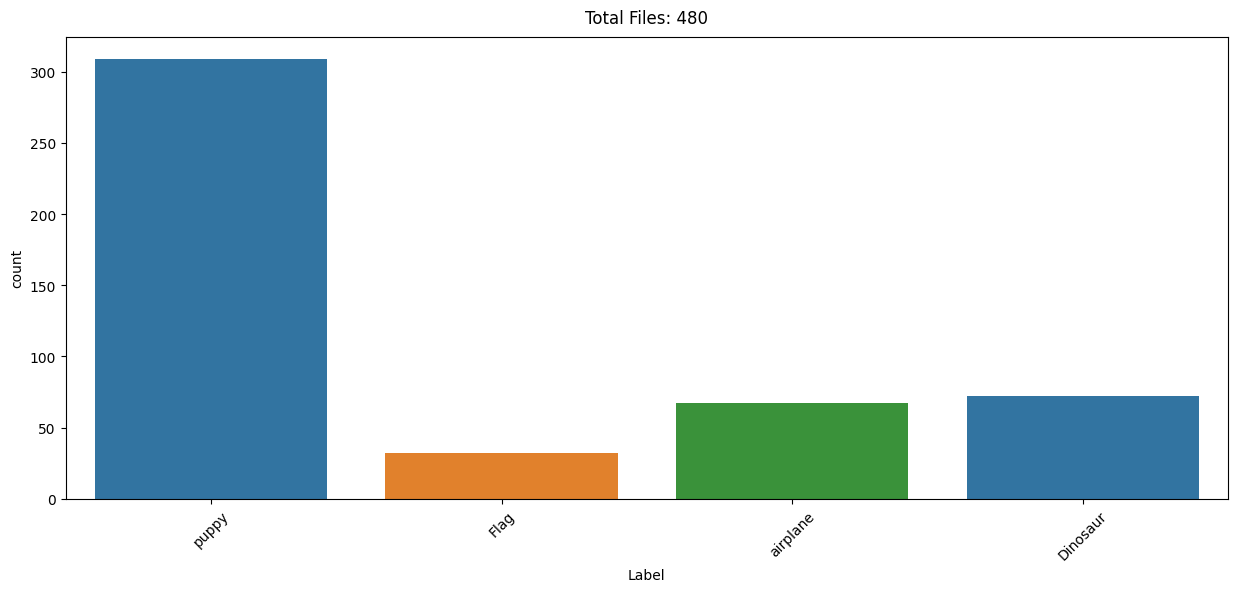

In [10]:
bar_colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]
plt.figure(figsize=(15, 6))
ax = sns.countplot(x=training_data["Label"], palette=bar_colors)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8,
                color='white')

plt.xticks(rotation=45)
plt.title(f'Total Files: {len(training_data)}', pad=10)
plt.show()

In [11]:
data_paths = []
labels = []

main_dirs = os.listdir(train_data)
for folder_name in main_dirs:
    folder_path = os.path.join(train_data, folder_name)
    files = os.listdir(folder_path)
    for file in files:
        file_path = os.path.join(folder_path, file)
        data_paths.append(file_path)
        labels.append(folder_name)

In [12]:
batch_size = 32
image_size = (150, 150)
num_channels = 3
image_shape = (image_size[0], image_size[1], num_channels)
data_dirs = pd.Series(data_paths, name='Path')
classes = pd.Series(labels, name='Label')

In [13]:
def preprocess_image(img):
    return img
train_df, val_test_df = train_test_split(
    training_data,
    train_size=0.8,
    shuffle=True,
    random_state=123
)
val_df, test_df = train_test_split(
    val_test_df,
    train_size=0.5,
    shuffle=True,
    random_state=123
)

In [14]:
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_image,
    rescale=1.0/255
)
train_df['Label'] = train_df['Label'].astype(str)
val_df['Label'] = val_df['Label'].astype(str)

train_generator = datagen.flow_from_dataframe(
    train_df,
    x_col='Path',
    y_col='Label',
    target_size=image_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

valid_generator = datagen.flow_from_dataframe(
    val_df,
    x_col='Path',
    y_col='Label',
    target_size=image_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

Found 370 validated image filenames belonging to 4 classes.
Found 45 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 14 invalid image filename(s) in x_col="Path". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 3 invalid image filename(s) in x_col="Path". These filename(s) will be ignored.
  warnings.warn(


In [15]:
class_indices = train_generator.class_indices
class_indices.keys()

dict_keys(['Dinosaur', 'Flag', 'airplane', 'puppy'])

In [16]:

labels = []
for key in class_indices.keys():
    labels.append(key)

total_labels = len(labels)

In [17]:
print("Labels: ", labels)
print("\nTotal no. of unique labels:", total_labels)

Labels:  ['Dinosaur', 'Flag', 'airplane', 'puppy']

Total no. of unique labels: 4


(667, 1000, 3)
(183, 275, 3)
(183, 275, 3)
(194, 259, 3)
(183, 275, 3)
(208, 242, 3)
(621, 820, 4)
(168, 299, 3)


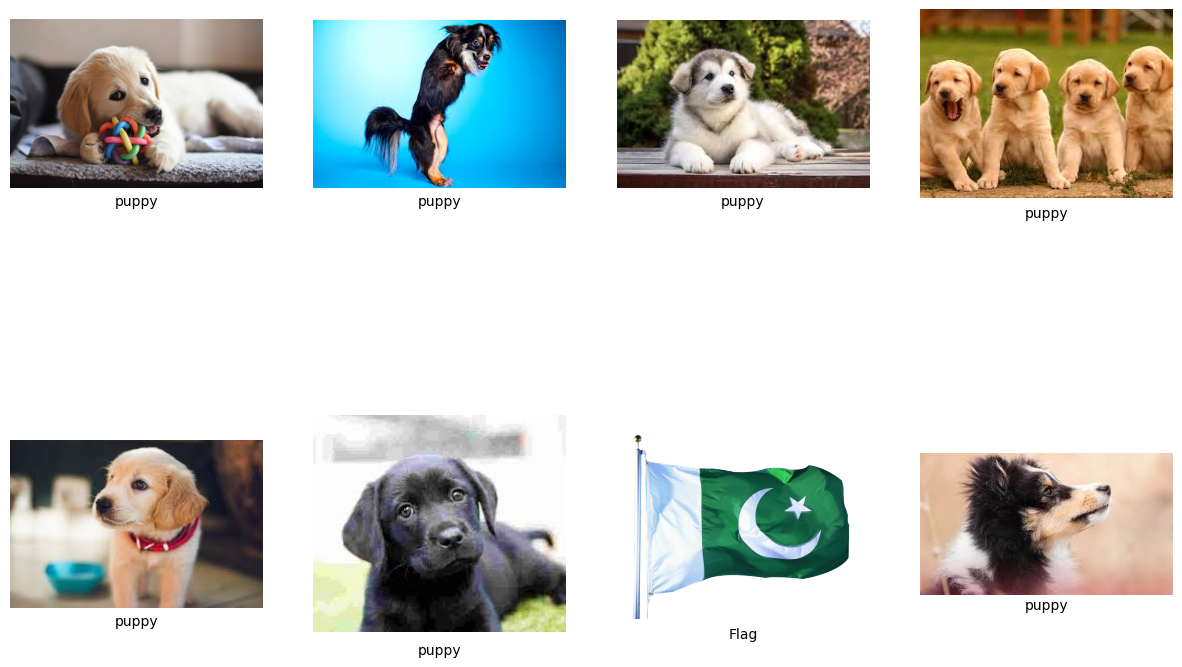

In [18]:

no_of_rows = 2
no_of_columns = 4

fig, axes = plt.subplots(no_of_rows, no_of_columns, figsize=(15, 10))

for i in range(no_of_rows):

    for j in range(no_of_columns):

        index = i * no_of_columns + j
        if index < len(training_data):
            im = Image.open(training_data.iloc[index]['Path'])
            img = np.array(im)
            print(img.shape)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            label = training_data.iloc[index]['Label']
            axes[i, j].text(0.5, -0.1, label, ha='center', transform=axes[i, j].transAxes)
plt.show()

In [19]:

base_model = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3) ,
    classes=4
)

29084464/29084464 [==============================] - 0s 0us/step


In [20]:

for layer in base_model.layers:
    layer.trainable = False
model = Sequential()
model.add(base_model)
model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))

model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 4, 4, 1024)        7037504   
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 1024)              16778240  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               5

In [21]:
checkpoint_path = "/content/drive/MyDrive/Data"
checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

In [22]:
model.compile(
    optimizer=Adamax(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x=train_generator,
    validation_data=valid_generator,
    epochs=5,
    verbose=1,
    validation_steps=None,
    callbacks=[checkpoint]
)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/5
12/12 [==============================] - ETA: 0s - loss: 7.4158 - accuracy: 0.4730
Epoch 1: val_accuracy improved from -inf to 0.80000, saving model to /content/drive/MyDrive/Data
12/12 [==============================] - 119s 9s/step - loss: 7.4158 - accuracy: 0.4730 - val_loss: 0.3518 - val_accuracy: 0.8000
Epoch 2/5


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


12/12 [==============================] - ETA: 0s - loss: 0.9563 - accuracy: 0.7297
Epoch 2: val_accuracy improved from 0.80000 to 0.93333, saving model to /content/drive/MyDrive/Data
12/12 [==============================] - 101s 9s/step - loss: 0.9563 - accuracy: 0.7297 - val_loss: 0.2117 - val_accuracy: 0.9333
Epoch 3/5
 1/12 [=>............................] - ETA: 35s - loss: 0.4923 - accuracy: 0.8125

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


12/12 [==============================] - ETA: 0s - loss: 0.5492 - accuracy: 0.8054
Epoch 3: val_accuracy improved from 0.93333 to 0.95556, saving model to /content/drive/MyDrive/Data
12/12 [==============================] - 92s 8s/step - loss: 0.5492 - accuracy: 0.8054 - val_loss: 0.1383 - val_accuracy: 0.9556
Epoch 4/5


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


12/12 [==============================] - ETA: 0s - loss: 0.2502 - accuracy: 0.9000
Epoch 4: val_accuracy improved from 0.95556 to 0.97778, saving model to /content/drive/MyDrive/Data
12/12 [==============================] - 92s 8s/step - loss: 0.2502 - accuracy: 0.9000 - val_loss: 0.0760 - val_accuracy: 0.9778
Epoch 5/5
 5/12 [===========>..................] - ETA: 21s - loss: 0.1569 - accuracy: 0.9384

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


12/12 [==============================] - ETA: 0s - loss: 0.1837 - accuracy: 0.9270
Epoch 5: val_accuracy did not improve from 0.97778
12/12 [==============================] - 39s 3s/step - loss: 0.1837 - accuracy: 0.9270 - val_loss: 0.0687 - val_accuracy: 0.9778


In [23]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size,
    callbacks=[checkpoint]
)

Epoch 1/10
11/11 [==============================] - ETA: 0s - loss: 0.1314 - accuracy: 0.9467
Epoch 1: val_accuracy did not improve from 0.97778
11/11 [==============================] - 35s 3s/step - loss: 0.1314 - accuracy: 0.9467 - val_loss: 0.0811 - val_accuracy: 0.9375
Epoch 2/10
11/11 [==============================] - ETA: 0s - loss: 0.1017 - accuracy: 0.9675
Epoch 2: val_accuracy improved from 0.97778 to 1.00000, saving model to /content/drive/MyDrive/Data
11/11 [==============================] - 86s 8s/step - loss: 0.1017 - accuracy: 0.9675 - val_loss: 0.0664 - val_accuracy: 1.0000
Epoch 3/10
 1/11 [=>............................] - ETA: 55s - loss: 0.0590 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


11/11 [==============================] - ETA: 0s - loss: 0.0831 - accuracy: 0.9734
Epoch 3: val_accuracy did not improve from 1.00000
11/11 [==============================] - 37s 3s/step - loss: 0.0831 - accuracy: 0.9734 - val_loss: 0.0296 - val_accuracy: 1.0000
Epoch 4/10
11/11 [==============================] - ETA: 0s - loss: 0.0801 - accuracy: 0.9688
Epoch 4: val_accuracy did not improve from 1.00000
11/11 [==============================] - 41s 4s/step - loss: 0.0801 - accuracy: 0.9688 - val_loss: 0.0663 - val_accuracy: 0.9375
Epoch 5/10
11/11 [==============================] - ETA: 0s - loss: 0.0864 - accuracy: 0.9675
Epoch 5: val_accuracy did not improve from 1.00000
11/11 [==============================] - 33s 3s/step - loss: 0.0864 - accuracy: 0.9675 - val_loss: 0.0480 - val_accuracy: 0.9688
Epoch 6/10
11/11 [==============================] - ETA: 0s - loss: 0.0686 - accuracy: 0.9734
Epoch 6: val_accuracy did not improve from 1.00000
11/11 [==============================] - 35s

In [24]:

train_history = pd.DataFrame(history.history)
train_history['Epoch'] = range(1, len(train_history) + 1)
train_history = train_history[['Epoch', 'loss', 'accuracy', 'val_loss', 'val_accuracy']]

train_history

,Epoch,loss,accuracy,val_loss,val_accuracy
0,1,0.131355,0.946746,0.081080,0.93750
1,2,0.101715,0.967456,0.066411,1.00000
2,3,0.083090,0.973373,0.029600,1.00000
3,4,0.080060,0.968750,0.066322,0.93750
4,5,0.086428,0.967456,0.048025,0.96875
5,6,0.068626,0.973373,0.053044,0.96875
6,7,0.049153,0.979290,0.074366,0.96875
7,8,0.055147,0.982249,0.002322,1.00000
8,9,0.061072,0.976331,0.044989,1.00000
9,10,0.047484,0.988166,0.083794,0.96875


In [25]:
train_loss, train_accuracy = model.evaluate(train_generator, steps=train_generator.samples // train_generator.batch_size)
val_loss, val_accuracy = model.evaluate(valid_generator, steps=valid_generator.samples // valid_generator.batch_size)

 8/11 [====================>.........] - ETA: 12s - loss: 0.0319 - accuracy: 0.9883

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 [==============================] - 4s 4s/step - loss: 0.0837 - accuracy: 0.9688


In [27]:
train_accuracy_percentage = train_accuracy * 100
val_accuracy_percentage = val_accuracy * 100



In [28]:
evaluation_results = pd.DataFrame({
    'Set': ['Train', 'Validation'],
    'Loss': [train_loss, val_loss],
    'Accuracy': [f'{train_accuracy_percentage:.2f}%', f'{val_accuracy_percentage:.2f}%']
})

evaluation_results

,Set,Loss,Accuracy
0,Train,0.023878,99.15%
1,Validation,0.083713,96.88%


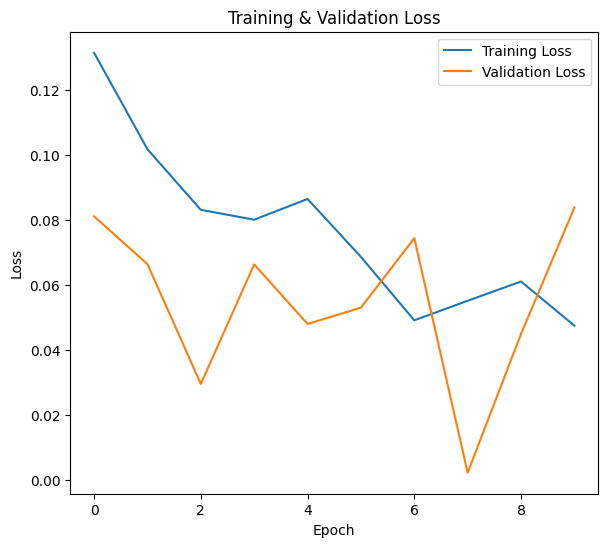

In [29]:

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(train_history['loss'], label='Training Loss')
plt.plot(train_history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

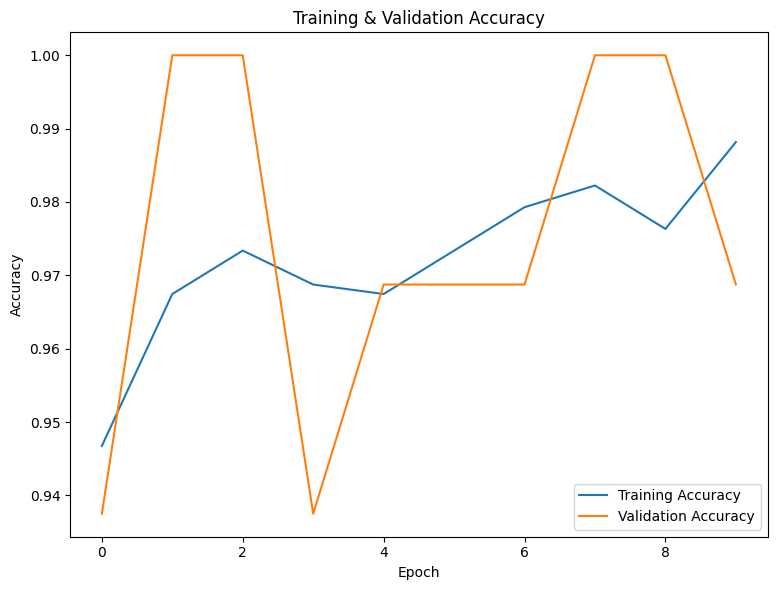

In [30]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 2)
plt.plot(train_history['accuracy'], label='Training Accuracy')
plt.plot(train_history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()